In [19]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import datetime
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
mypath = "../data/revisions/"
file = "rev_kash_hi_21-10-2019 12-30-36.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        df = pd.DataFrame(data)

In [11]:
df['timestamp'] = df['timestamp'].astype(str)
df.timestamp=df.timestamp.str.replace("T"," ")
df.timestamp=df.timestamp.str.replace("Z","")
# df.to_csv(r'kash_hi.csv')
print(df[:3])

                                    user            timestamp   size  \
0                           Srajaltiwari  2019-10-13 07:02:18  41085   
1                               J ansari  2019-10-10 13:26:48  41050   
2  2401:4900:B8C:C40:BD9C:57C4:9690:FDA5  2019-10-10 09:12:44  41033   

                                               slots  \
0  {'main': {'contentmodel': 'wikitext', 'content...   
1  {'main': {'contentmodel': 'wikitext', 'content...   
2  {'main': {'contentmodel': 'wikitext', 'content...   

                                             comment  anon  
0                                    साँचा जोड़ा गया   NaN  
1  [[Special:Contributions/2401:4900:B8C:C40:BD9C...   NaN  
2                                                     True  


In [21]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])
df['size'] = pd.to_numeric(df['size'])
df.dtypes

user       object
size        int64
slots      object
comment    object
anon       object
dtype: object

In [22]:
# df = df.set_index('timestamp')
df.head(3)
# df.index

,user,size,slots,comment,anon
timestamp,,,,,
2019-10-13 07:02:18,Srajaltiwari,41085,"{'main': {'contentmodel': 'wikitext', 'content...",साँचा जोड़ा गया,NaN
2019-10-10 13:26:48,J ansari,41050,"{'main': {'contentmodel': 'wikitext', 'content...",[[Special:Contributions/2401:4900:B8C:C40:BD9C...,NaN
2019-10-10 09:12:44,2401:4900:B8C:C40:BD9C:57C4:9690:FDA5,41033,"{'main': {'contentmodel': 'wikitext', 'content...",,True


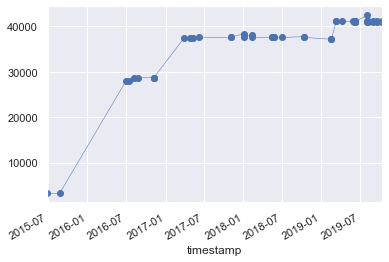

In [30]:
df['size'].plot(marker='o', linestyle='-', linewidth=0.5)